In [ ]:
!pip install pystan prophet

In [ ]:
import pandas as pd

# 1) Phophet

Prophet is a special case of the Generalized Additive Model. Whereas ARIMA tries to build a formula for future values as a function of past values, Prophet tries to detect “change points”; you can think of Prophet as curve-fitting.

growth g(t) + seasonality s(t) + holidays h(t) + error e_t

**Reference**: 

https://facebook.github.io/prophet/docs/trend_changepoints.html#automatic-changepoint-detection-in-prophet

https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

In [ ]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

## 1.1 Fitting Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")
df['new_cases'] = df.cases - df.cases.shift().fillna(0)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df['rolling_weekly_avg'] = df['new_cases'].rolling(window=7).mean().fillna(0)
df.head()

,cases,deaths,new_cases,rolling_weekly_avg
date,,,,
2020-01-21,1,0,1.0,0.0
2020-01-22,1,0,0.0,0.0
2020-01-23,1,0,0.0,0.0
2020-01-24,2,0,1.0,0.0
2020-01-25,3,0,1.0,0.0


In [ ]:
# create timeseries readable by prophet
ts = pd.DataFrame({'ds' : df.index, 'y' : df['new_cases']})
# ts['cap'] = 30000 # unused in linear growth
# ts['floor'] = 0 # unused in linear growth
ts.tail()

,ds,y
date,,
2022-12-02,2022-12-02,73431.0
2022-12-03,2022-12-03,4861.0
2022-12-04,2022-12-04,4606.0
2022-12-05,2022-12-05,53999.0
2022-12-06,2022-12-06,48405.0


In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
prophet = Prophet(interval_width=0.95)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=20)
forecast = prophet.predict(future)

# ds contains the timestamp entry of the forecast
# yhat contains the forecasted value of the time series
# yhat_lower contains the bottom of the confidence interval for the forecast
# yhat_upper contains the bottom of the confidence interval for the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpls4g4hru/7zap2x6g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpls4g4hru/du5iu7_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84397', 'data', 'file=/tmp/tmpls4g4hru/7zap2x6g.json', 'init=/tmp/tmpls4g4hru/du5iu7_1.json', 'output', 'file=/tmp/tmpls4g4hru/prophet_modeloxxt0a2n/prophet_model-20221207171638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:16:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:16:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1066,2022-12-22,144173.954262,-1613.215383,300787.457706
1067,2022-12-23,160224.577966,1604.121599,332327.278566
1068,2022-12-24,121763.619010,-59194.295656,288899.529523
1069,2022-12-25,125572.549021,-46881.672275,306484.609337
1070,2022-12-26,219545.316422,53259.582478,382229.525110


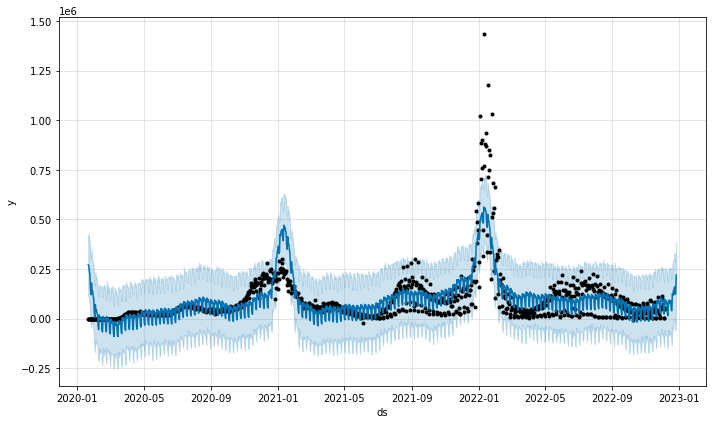

In [ ]:
fig = prophet.plot(forecast)

## 1.2 Time Series Components

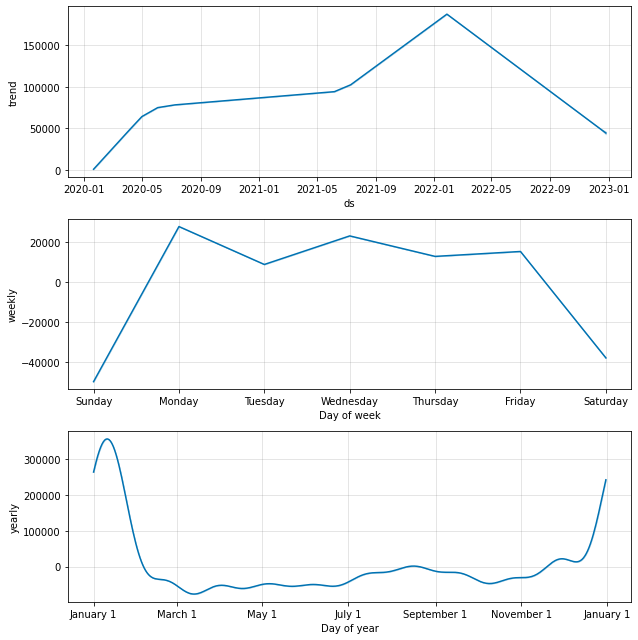

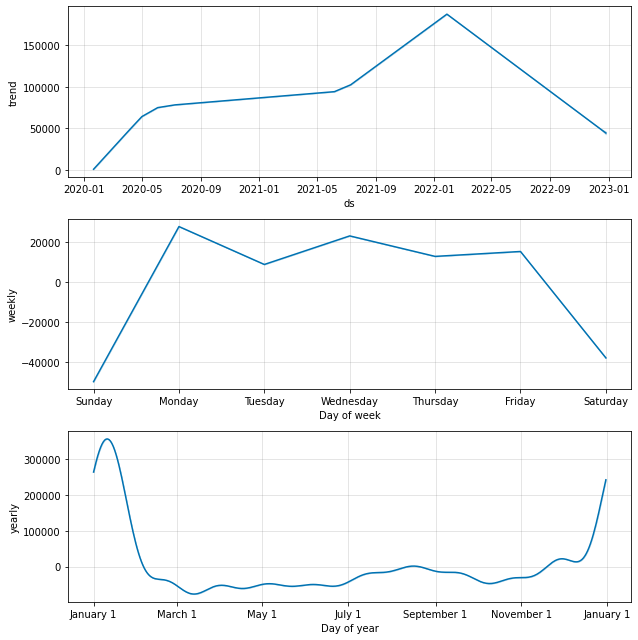

In [ ]:
prophet.plot_components(forecast)

705   2021-12-26
738   2022-01-28
772   2022-03-03
805   2022-04-05
839   2022-05-09
Name: ds, dtype: datetime64[ns]


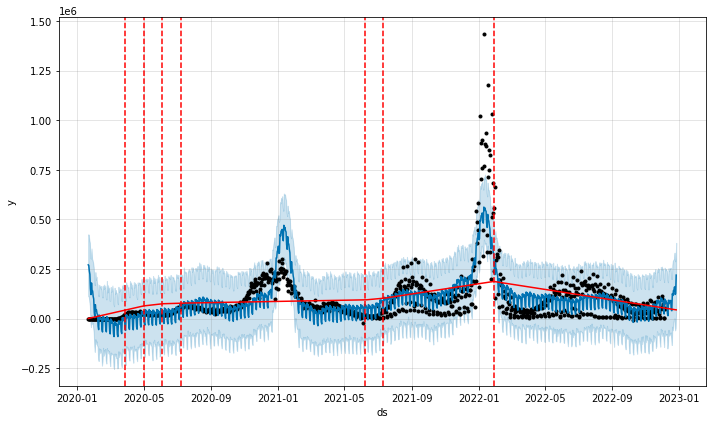

In [ ]:
# Changepoints are the datetime points where the time series have abrupt changes in the trajectory.
# By default, Prophet adds 25 changepoints to the initial 80% of the data-set.

print(prophet.changepoints.tail())
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
fig

## 1.3 Evaluation

https://facebook.github.io/prophet/docs/diagnostics.html

In [ ]:
# cross-validation on a horizon of 30 days
# starting with 365 days of training data in the first cutoff 
# making predictions every 180 days
df_cv = cross_validation(prophet, initial='365 days', period='180 days', horizon='30 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2021-05-15 00:00:00 and 2022-11-06 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpls4g4hru/p83ulqx1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpls4g4hru/8bhnz569.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68941', 'data', 'file=/tmp/tmpls4g4hru/p83ulqx1.json', 'init=/tmp/tmpls4g4hru/8bhnz569.json', 'output', 'file=/tmp/tmpls4g4hru/prophet_modelzdz17mq6/prophet_model-20221207171917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:19:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:19:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpls4g4hru/726p5lfa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpls4g4hru/4qef6owj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
115,2022-12-02,121319.184904,-47822.508246,282028.606922,73431.0,2022-11-06
116,2022-12-03,65944.341937,-95623.547422,229579.322868,4861.0,2022-11-06
117,2022-12-04,51617.218416,-115625.361675,224432.839458,4606.0,2022-11-06
118,2022-12-05,127875.534838,-29550.569611,300998.142934,53999.0,2022-11-06
119,2022-12-06,106228.930809,-39385.383638,264228.714456,48405.0,2022-11-06


In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,2.469258e+09,49691.626348,38043.074796,0.921624,0.259446,0.512684,0.833333
1,4 days,1.994940e+09,44664.752518,32072.672201,0.876243,0.240043,0.468541,0.833333
2,5 days,2.170476e+09,46588.364999,32562.143050,1.163651,0.241736,0.498195,0.833333
3,6 days,1.665431e+09,40809.689397,31473.370648,1.496800,0.414315,0.549423,0.833333
4,7 days,2.356071e+09,48539.371738,38591.567298,2.073174,0.666718,0.711555,0.750000
